In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
df = pd.read_csv("23-boston.csv", header=None, delimiter=r"\s+", names=column_names)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
import math

def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()
    

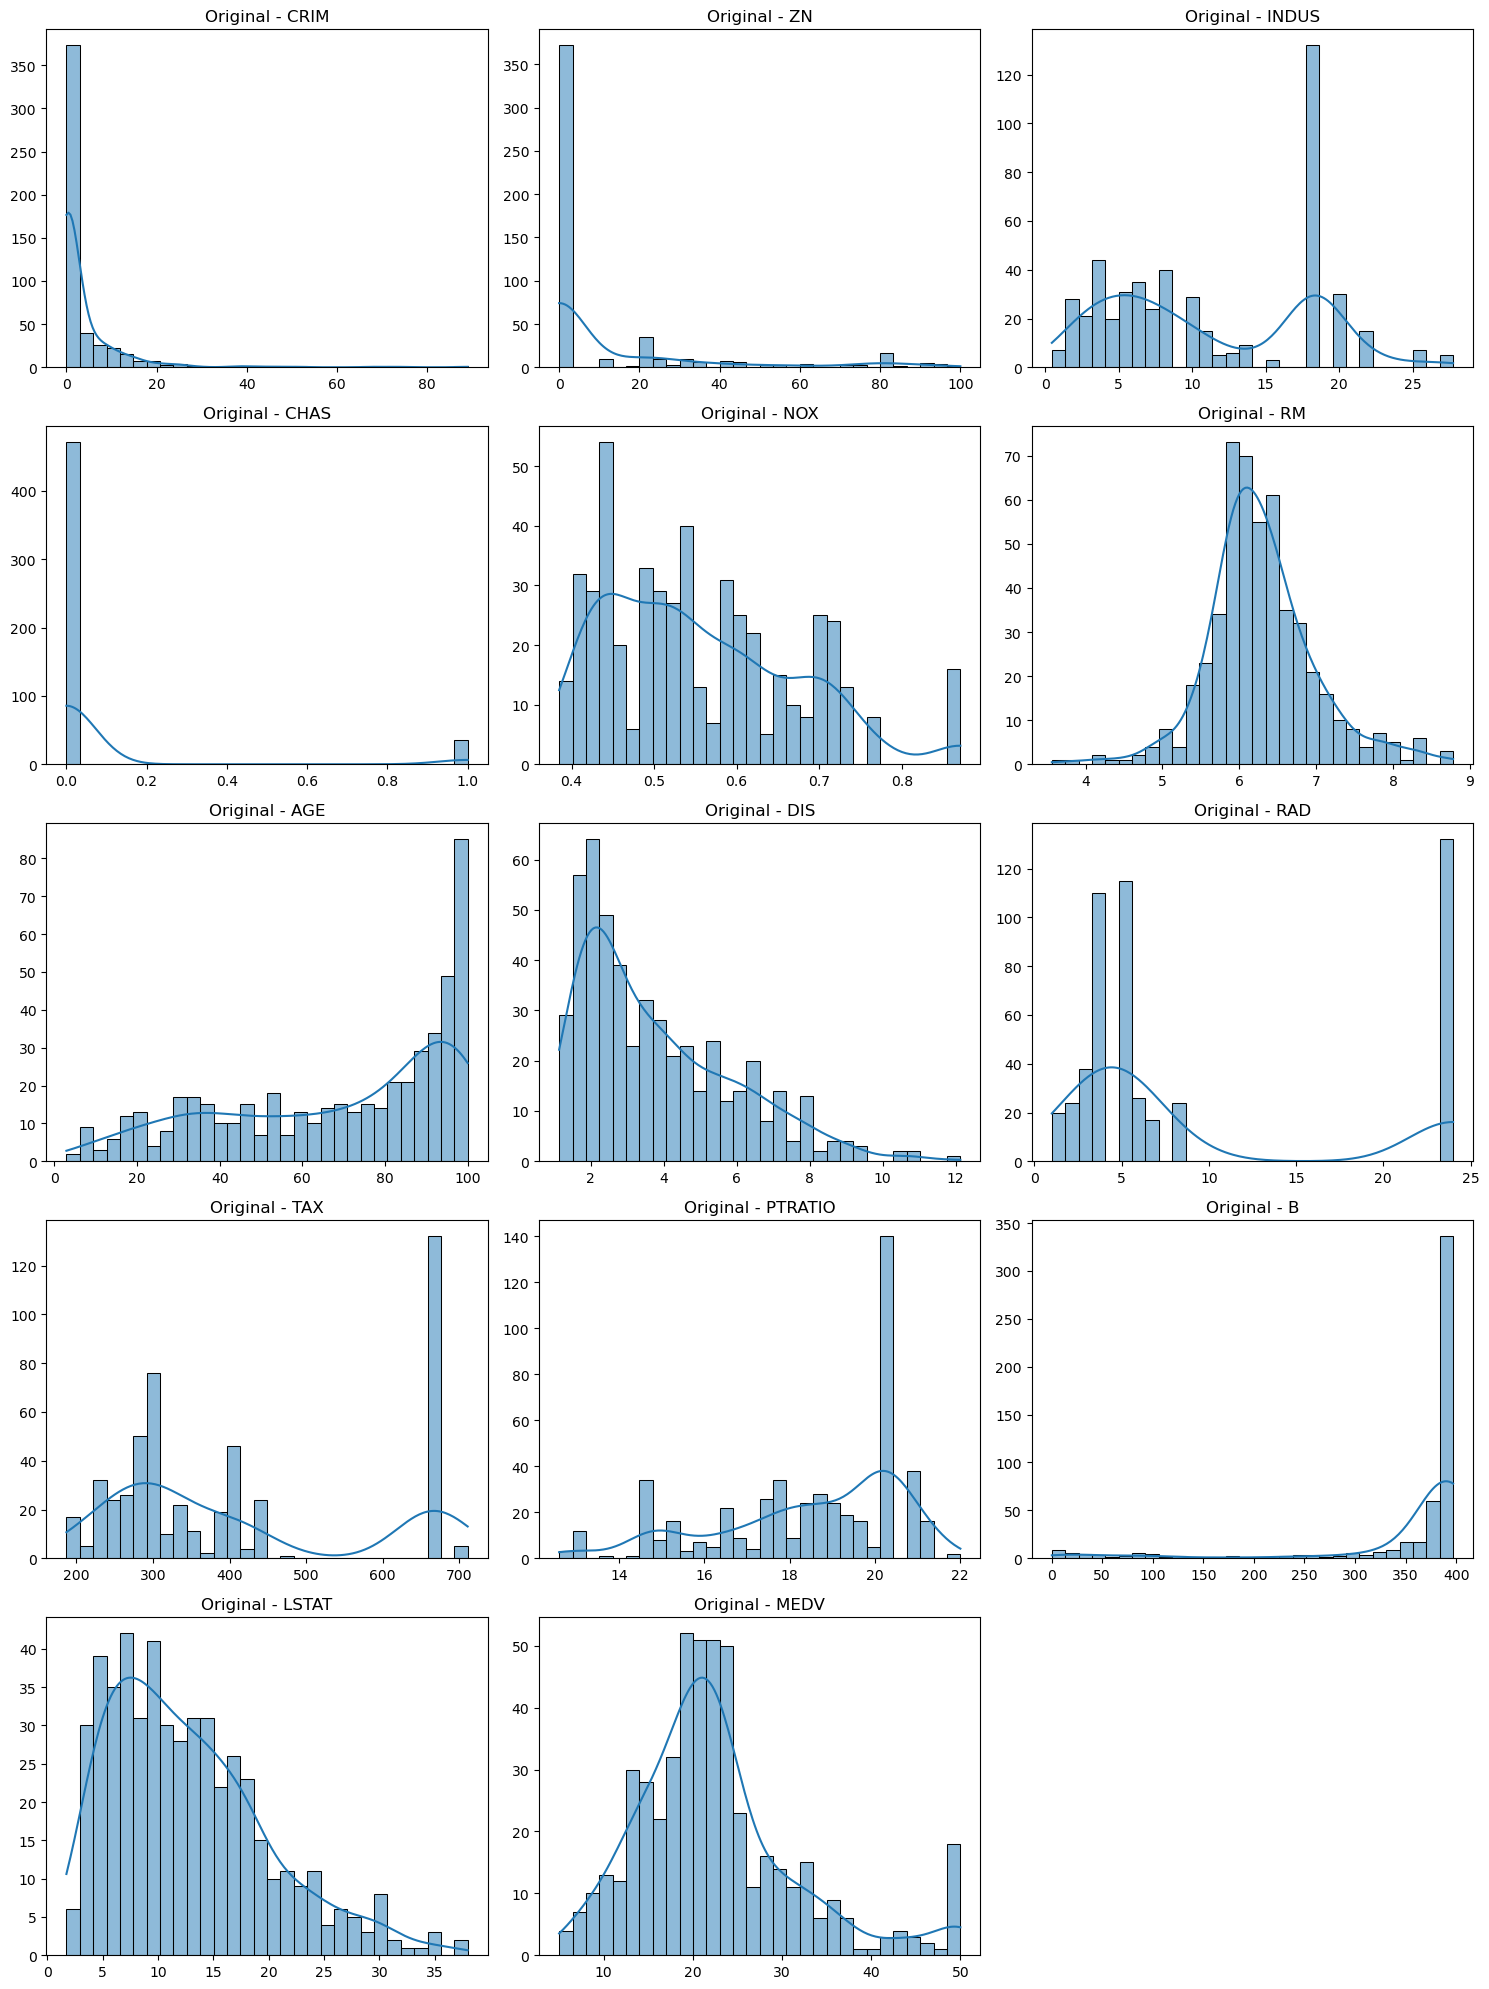

In [9]:
plot_all_histograms(df,title_prefix="Original - ")

In [10]:
from scipy.stats import skew

In [12]:
df.apply(skew).sort_values(ascending=False)

CRIM       5.207652
CHAS       3.395799
ZN         2.219063
MEDV       1.104811
DIS        1.008779
RAD        1.001833
LSTAT      0.903771
NOX        0.727144
TAX        0.667968
RM         0.402415
INDUS      0.294146
AGE       -0.597186
PTRATIO   -0.799945
B         -2.881798
dtype: float64

In [13]:
X = df.drop("MEDV",axis=1)
y = df["MEDV"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [16]:
from sklearn.preprocessing import PowerTransformer

In [18]:
pt_X = PowerTransformer(method="yeo-johnson")

In [19]:
X_train_transformed = pt_X.fit_transform(X_train)
X_test_tranformed = pt_X.transform(X_test)

In [21]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [22]:
X_train_transformed_df = pd.DataFrame(X_train_transformed,columns=column_names)

In [23]:
X_train_transformed_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.904167,1.724429,-1.219281,-0.267615,-1.133724,0.654830,-1.320696,1.297076,-0.255374,0.244488,-1.427362,0.426553,-1.322242
1,1.605896,-0.588616,1.011100,-0.267615,1.465402,-0.490305,0.689192,-1.115580,1.457243,1.370436,0.848622,-2.703630,2.139134
2,-0.925383,-0.588616,-1.492987,-0.267615,-0.496175,-0.175553,-0.053289,0.037511,-0.944274,-1.975622,-0.502857,0.350835,0.303698
3,0.999995,-0.588616,1.161199,-0.267615,2.026049,-0.985039,0.975581,-1.456339,-0.255374,0.275674,-1.555351,-0.550002,1.209644
4,-0.628294,-0.588616,0.138417,-0.267615,-1.475942,-0.043701,-1.910821,0.936406,-0.551621,-0.473029,0.216963,0.073562,-0.622936
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1.668295,-0.588616,1.011100,-0.267615,1.072096,1.447764,1.100495,-1.734661,1.457243,1.370436,0.848622,0.643031,0.342306
400,-0.390949,-0.588616,1.382524,-0.267615,0.752694,-0.654775,0.996311,-0.517389,-0.551621,0.472960,1.592342,0.396688,0.542831
401,1.366441,-0.588616,1.011100,-0.267615,1.206460,0.184264,1.021234,-1.275079,1.457243,1.370436,0.848622,0.643031,1.013945
402,-0.636275,1.664783,-0.676234,-0.267615,-1.216540,-0.973231,-0.000938,1.644135,0.171014,-0.249768,0.159469,0.409545,0.922866


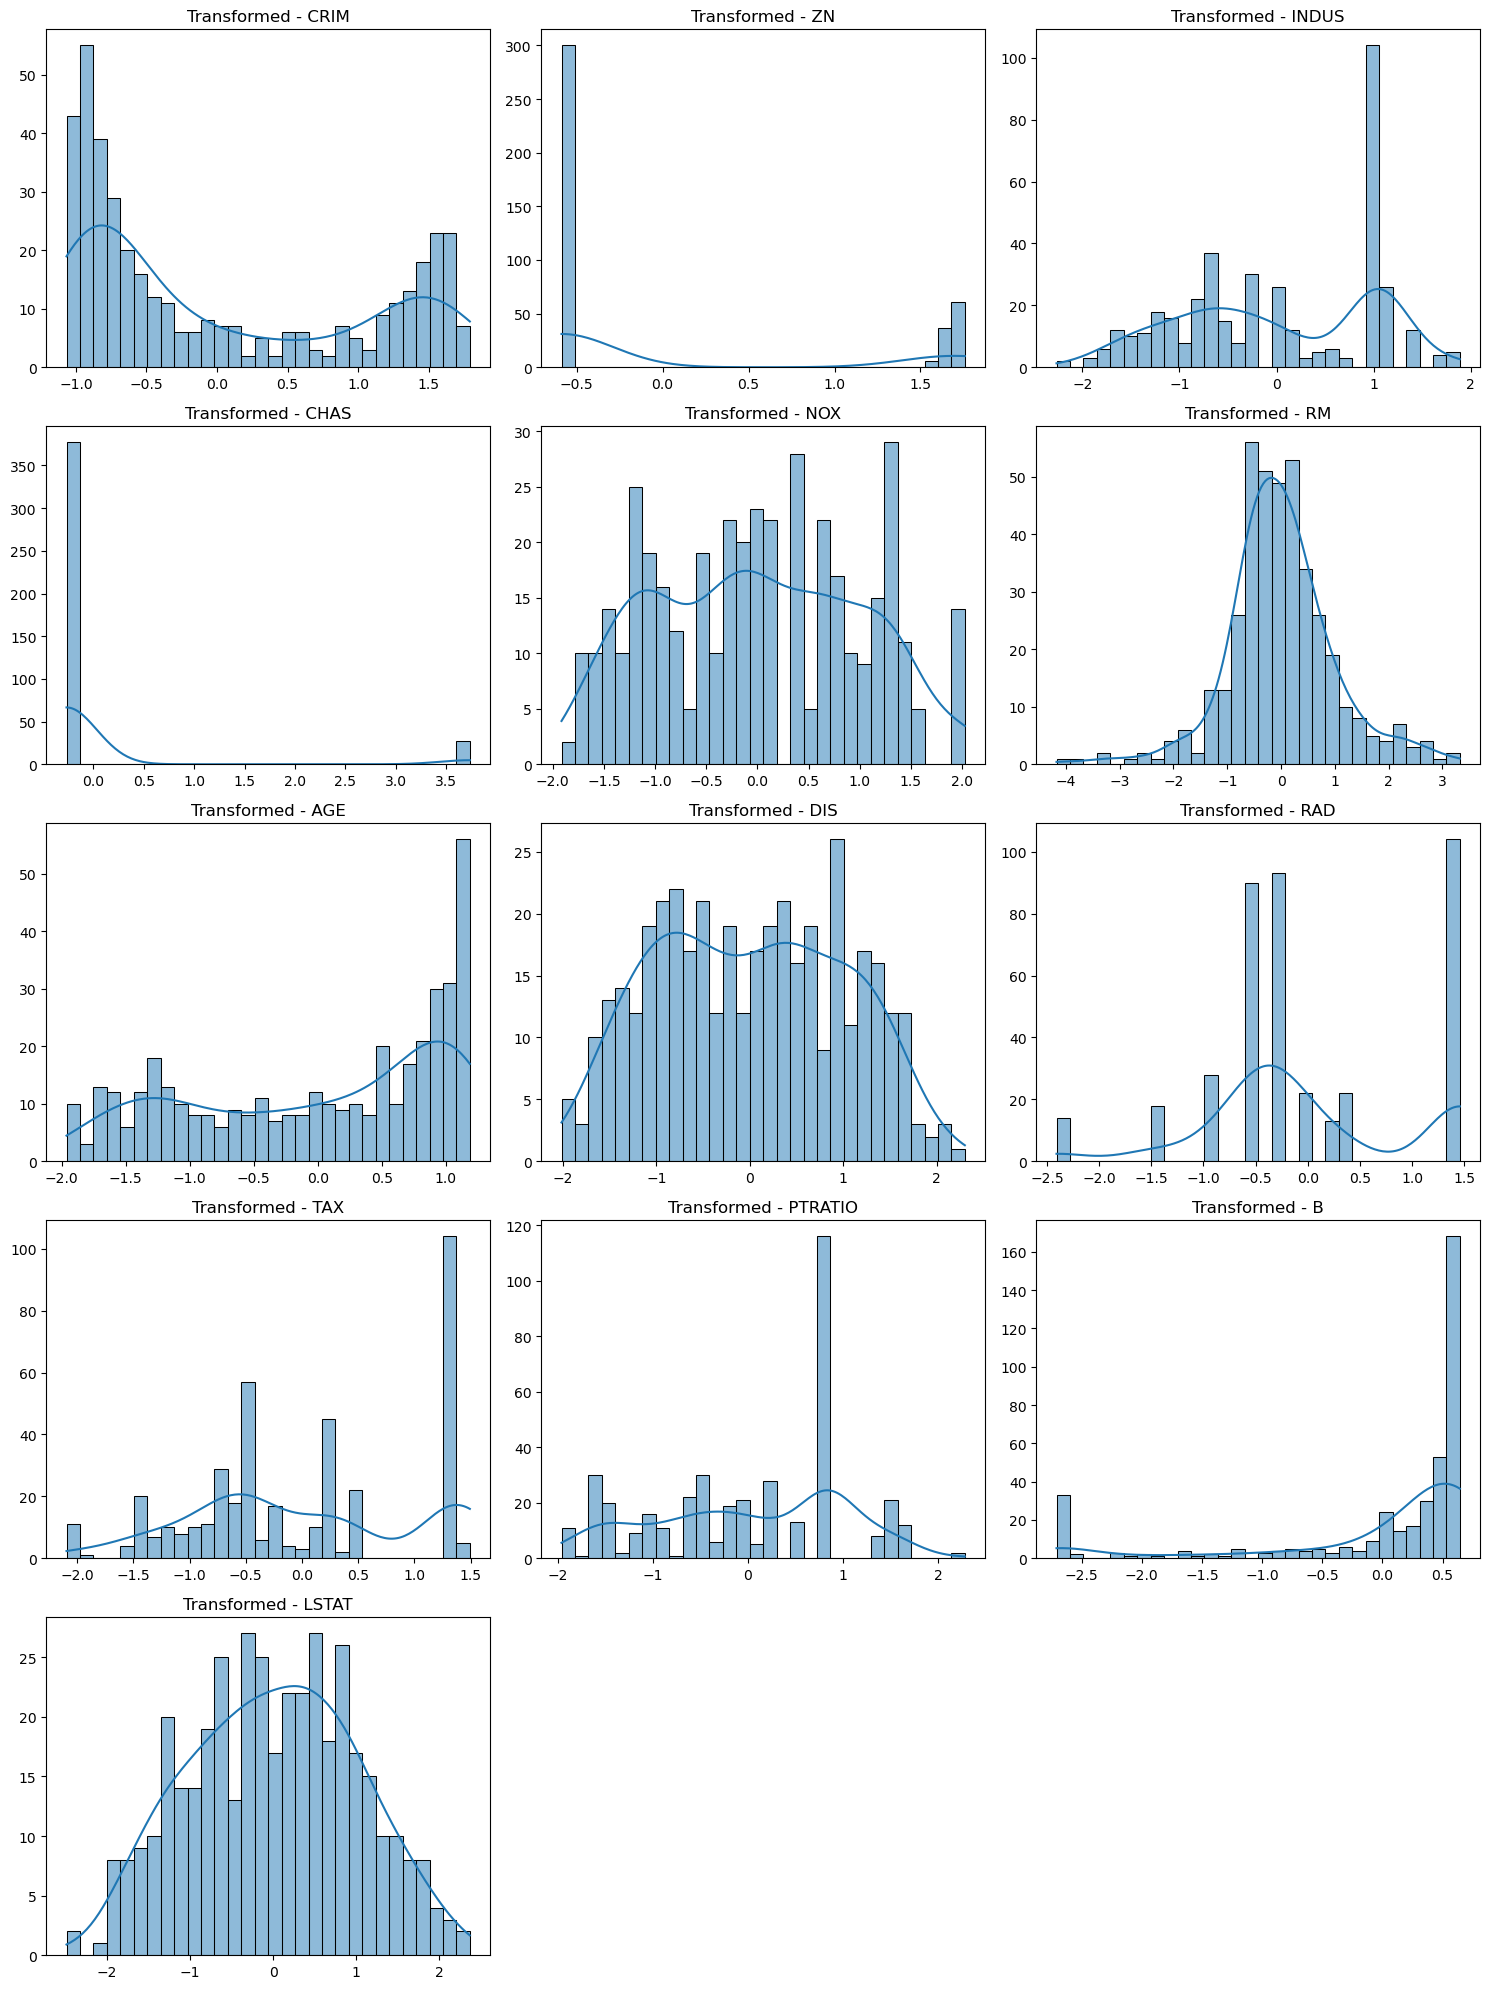

In [24]:
plot_all_histograms(X_train_transformed_df, title_prefix="Transformed - ")

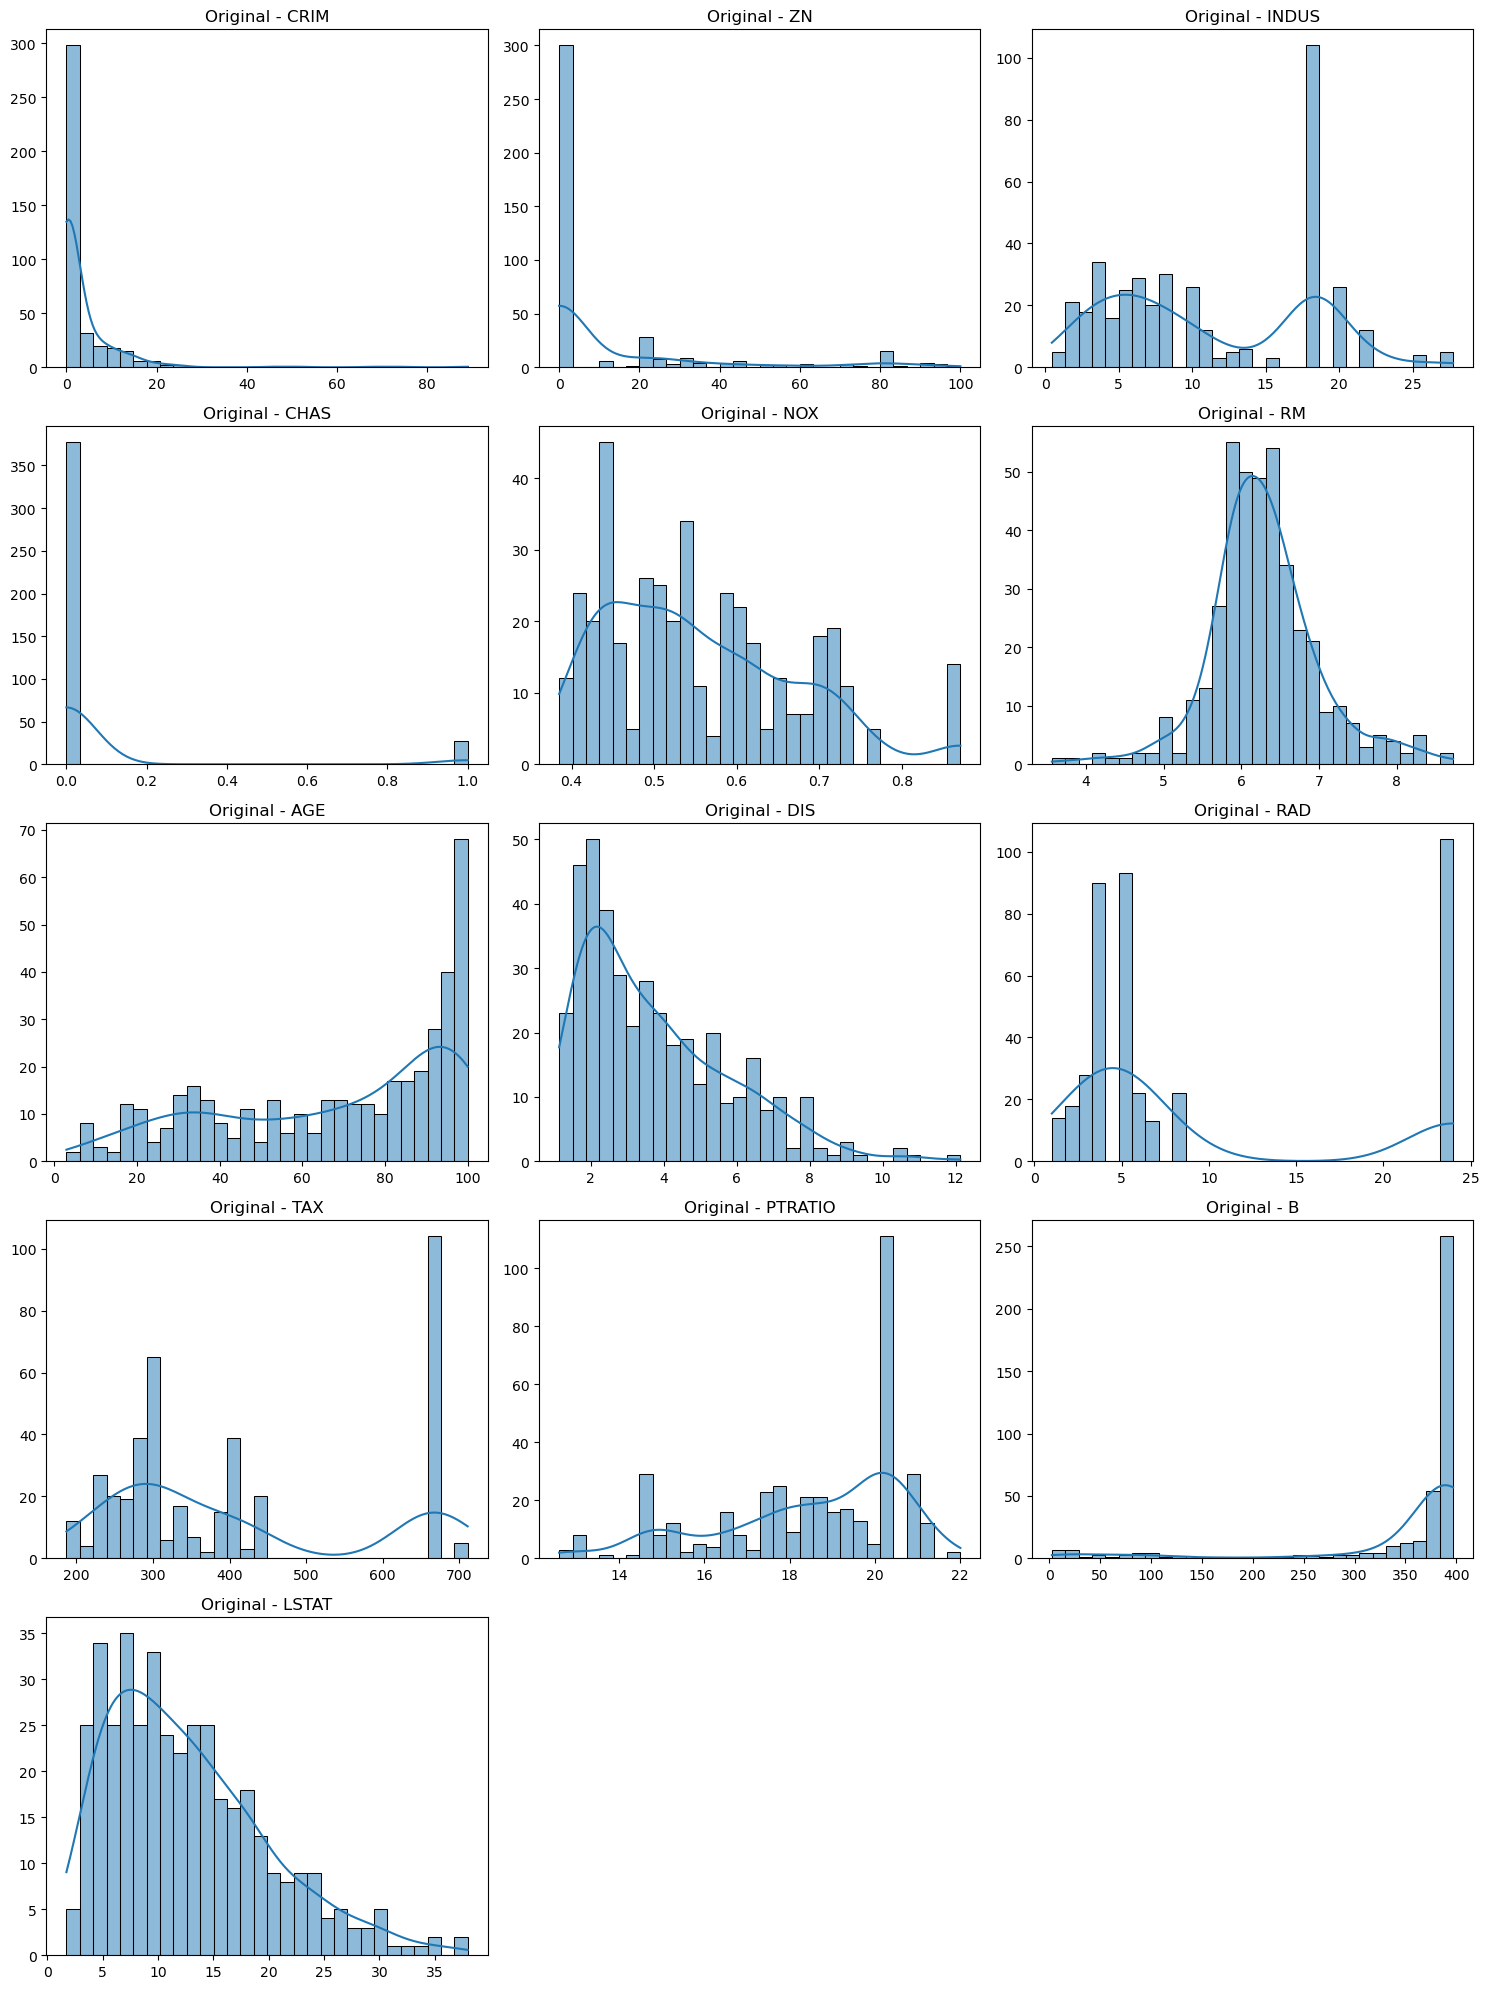

In [25]:
plot_all_histograms(X_train, title_prefix="Original - ")

In [26]:
from scipy.stats import boxcox

In [27]:
y_train_transformed, lambda_y = boxcox(y_train)

In [28]:
def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.power(y * lambda_ + 1, 1 / lambda_)

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_transformed, y_train_transformed)

LinearRegression()

In [30]:
y_pred_transformed = model.predict(X_test_tranformed)

In [31]:
y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)

In [32]:
y_pred_transformed

array([4.47043281, 5.24054541, 4.18610418, 4.25058295, 4.39706739,
       3.11860989, 3.72618124, 3.42093031, 4.61072635, 3.85648994,
       3.66666235, 4.31945529, 3.93090008, 3.46466129, 4.26891676,
       3.64669787, 3.18757119, 3.21130645, 4.30168693, 3.22073288,
       5.47410384, 3.39166001, 4.22873412, 3.8272682 , 4.10106655,
       4.0181984 , 4.39625616, 3.87695607, 3.91839098, 4.26131069,
       4.36677524, 3.29549491, 4.14251915, 3.65189376, 4.21792728,
       3.94207888, 4.3197492 , 4.48226677, 3.81596164, 3.73994207,
       5.03455869, 5.08249478, 3.75264544, 4.58414269, 4.05657433,
       3.99520302, 4.00591173, 4.88533725, 4.44326887, 3.78290319,
       4.97636178, 3.69283015, 3.46220244, 3.55109798, 3.77747191,
       4.78907856, 3.15937414, 4.50498329, 3.34020184, 4.5151691 ,
       3.52887063, 4.69331461, 3.85168239, 4.80649324, 5.33324892,
       3.95354463, 4.01235763, 3.85705013, 4.47529548, 3.72622604,
       3.91224994, 4.5452471 , 3.9326256 , 3.29860636, 5.42861

In [33]:
y_pred_original

array([25.03872441, 37.24542129, 21.45016   , 22.22506797, 24.06960733,
       11.46968406, 16.53139518, 13.80232517, 26.97950183, 17.82145951,
       15.96777772, 23.0775505 , 18.59376348, 14.16926475, 22.44947643,
       15.78223295, 11.97145178, 12.14818827, 22.85513774, 12.21895995,
       41.76949707, 13.5610327 , 21.96000123, 17.52533539, 20.46163799,
       19.53400362, 24.05906319, 18.03124908, 18.4620788 , 22.35615633,
       23.67839599, 12.79211617, 20.93880756, 15.83035396, 21.82983985,
       18.71208382, 23.08124419, 25.19794904, 17.41182846, 16.6639595 ,
       33.59134805, 34.41469825, 16.78709656, 26.60273864, 19.95927504,
       19.28269674, 19.39940127, 31.12941403, 24.67630377, 17.08334949,
       32.61318219, 16.21363412, 14.14842653, 14.91768324, 17.02986386,
       29.6200394 , 11.76419269, 25.5058849 , 13.14508424, 25.64494134,
       14.72225178, 28.17754196, 17.77246596, 29.88864124, 38.99118779,
       18.83407136, 19.4699235 , 17.82717543, 25.10405251, 16.53

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
print("R2 Score:", r2_score(y_test, y_pred_original))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_original))

R2 Score: 0.7755639716762128
Mean Squared Error: 17.355927999173183


In [45]:
print("R2 Score:", r2_score(y_test, y_pred_transformed))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_transformed))

R2 Score: -3.846659071112649
Mean Squared Error: 374.7984069358765


In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.6920749038652129
RMSE: 4.879779243478212
